# Importing Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
churn = pd.read_csv('Data/processed_churn.csv')
churn

,account_length,international_plan,voice_mail_plan,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls,churn,avg_day_call_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,110,99,91,3,1,0.0,0.409727,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,123,103,103,3,1,0.0,0.223333,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,114,110,104,5,0,0.0,0.362982,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,71,88,89,7,2,0.0,0.716901,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,113,122,121,3,3,0.0,0.250796,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,77,126,83,6,2,0.0,0.344805,...,0,0,0,0,0,0,0,0,0,0
3329,68,0,0,57,55,123,4,3,0.0,0.689298,...,0,0,0,0,0,0,0,0,1,0
3330,28,0,0,109,58,91,6,2,0.0,0.282018,...,0,0,0,0,0,0,0,0,0,0
3331,184,1,0,105,84,137,10,2,0.0,0.346190,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Establish predictor and result variables
X = churn.drop('churn', axis=1)  
y = churn['churn']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(churn)
# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls,avg_day_call_charge,avg_eve_call_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-1.404508,-0.327448,-0.611418,1.330852,0.401340,0.004940,-0.595235,-0.427903,-1.713963,0.296309,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
1,0.366388,-0.327448,-0.611418,0.529165,0.401340,0.670832,-1.417963,0.324616,-0.151181,-0.009049,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
2,0.518179,-0.327448,1.635543,-1.875896,0.849774,-0.763398,0.227493,1.829653,2.567458,-0.440451,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
3,2.010792,-0.327448,-0.611418,1.681590,0.650470,-0.660953,-0.183871,-0.427903,-1.096820,-0.641407,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555
4,0.290493,-0.327448,-0.611418,1.080325,-0.296224,0.056162,1.050221,1.077134,-0.252817,-0.450437,...,-0.139942,-0.130744,-0.150014,-0.144338,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555


# Defined Functions

These are predefined functions that will allow me to easily plot 

In [22]:
# Plotting confusion Matrix
def print_confusion_matrix(model,model_name):
    plt.figure(figsize =(10,10))
    plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues,normalize='true')
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontsize='small'  
    )
    plt.title(model_name + ' Confusion Matrix')
    plt.show()

In [44]:
def plot_feature_importances(model, name):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values)
    plt.title('Feature Importance for {}'.format(name))
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

# Logistic Regression

As a baseline, I will use a logistic regression model. It should be noted that class weights for all models moving forwar

In [24]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', class_weight='balanced', random_state=42)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight='balanced',
                   fit_intercept=False, random_state=42, solver='liblinear')

In [25]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [26]:
print(confusion_matrix(y_test, y_hat_test))
print(classification_report(y_test, y_hat_test))

[[548 161]
 [ 30  95]]
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85       709
         1.0       0.37      0.76      0.50       125

    accuracy                           0.77       834
   macro avg       0.66      0.77      0.68       834
weighted avg       0.86      0.77      0.80       834



<Figure size 720x720 with 0 Axes>

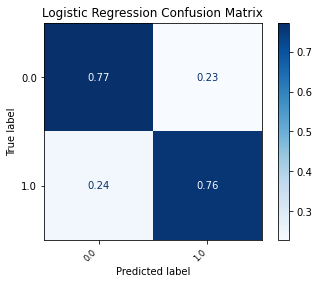

In [27]:
print_confusion_matrix(model_log, 'Logistic Regression')

The baseline performed admirably well, with a 77% overall accuracy.

# Decision Trees

In [31]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=42,class_weight = 'balanced',
                                    max_features = 'auto')  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_features='auto',
                       random_state=42)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       709
         1.0       0.35      0.31      0.33       125

    accuracy                           0.81       834
   macro avg       0.61      0.60      0.61       834
weighted avg       0.80      0.81      0.80       834



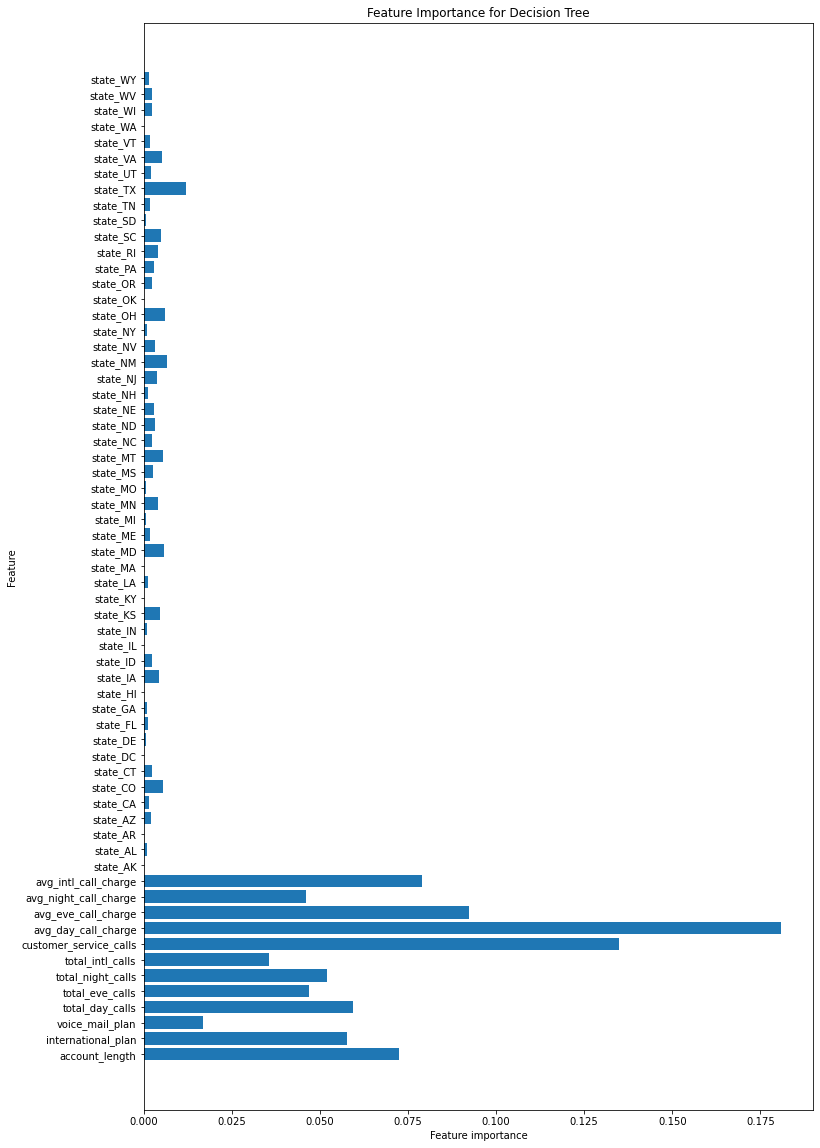

In [45]:
plot_feature_importances(classifier, 'Decision Tree')

<Figure size 720x720 with 0 Axes>

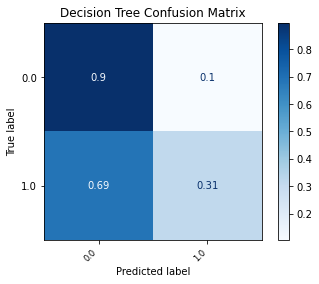

In [35]:
print_confusion_matrix(classifier, 'Decision Tree')